# SVM

>- 线性可分 or 线性不可分
>
>- 对偶问题
>
>- 间隔最大化
>
>- hinge loss
>
>- 核技巧
>
>

> 注意这里为了不失一般性，我们用了CS231n的多分类SVM
>[CS231n SVM](http://cs231n.github.io/linear-classify/)
>
>$$Hinge\ loss = \max(0,s_j - s_{y_i}+\Delta)$$
>
>$$s_j = X W_j $$
>
>这里的$\Delta$常常取1

In [17]:
import numpy as np
import matplotlib.pyplot as plt

% matplotlib inline


In [2]:
class svm(object):
    def __init__(self):
        # W : D,C
        self.W = None

    def predict(self, X):
        y_pred = np.zeros(X.shape[1])
        y_pred = np.argmax(np.dot(X, self.W), axis=1)
        return y_pred

    def train(self, X, y, learning_rate=1e-3, reg=1e-5, num_iters=1000, batch_size=200, verbose=False):
        # X: N,D
        # Y: N,
        num_train, dim = X.shape
        num_class = len(set(y))

        if self.W is None:
            self.W = 0.001 * np.random.randn(X.shape[1], num_class)

        loss_history = []
        for it in range(num_iters):
            indice = np.random.choice(num_train, batch_size)
            X_batch, y_batch = X[indice], y[indice]

            loss, grad = self.svmLoss(X_batch, y_batch, reg)
            loss_history.append(loss)

            self.W -= learning_rate * grad
        return loss_history

    # 向量化的写法
    def svmLoss(self, X, y, reg):
        dw = np.zeros_like(self.W)
        num_train, dim = X.shape
        num_class = len(set(y))

        loss = 0.0
        scores = X.dot(self.W)  #scroes : N,C
        margin = scores - scores[range(0, X.shape[0]), y].reshape(-1, 1) + 1
        margin[range(X.shape[0]), y] = 0
        margin = (margin > 0) * margin
        loss += margin.sum() / num_train
        loss += 0.5 * reg * np.sum(self.W ** 2)

        counts = (margin > 0).astype(int)
        counts[range(num_train), y] -= np.sum(counts, axis=1)
        dw += np.dot(X.T, counts) / num_train + reg * self.W

        return loss, dw


# 下面训练分类器，并做一点简单的可视化

In [3]:
from sklearn.datasets import make_moons
x, y = make_moons(250, noise=0.25)

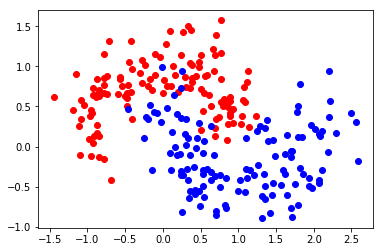

In [21]:
plt.figure()
for i in range(x.shape[0]):
    col = {0: 'r', 1: 'b'}
    plt.plot(x[i, 0], x[i, 1], col[y[i]] + 'o')
# plt.ylim([-1.5, 1.5])

In [22]:
c=svm()
c.train(x,y)

[0.99940491257897179,
 0.99856709481689143,
 0.99766345310901849,
 0.99664174348286427,
 0.99521733117054623,
 0.99474457617238843,
 0.99445034880186767,
 0.99301532360575329,
 0.99196224377204745,
 0.99164684825773319,
 0.98914749487750464,
 0.99038010277051547,
 0.98949802868553993,
 0.98762837891809641,
 0.98673008310543886,
 0.98604438667391603,
 0.98630105813515079,
 0.98640037394918645,
 0.98295390982676212,
 0.98318034492417472,
 0.98343071760011858,
 0.98252583581885367,
 0.98092088148430068,
 0.97859302235874446,
 0.98078783088573374,
 0.97848946352036892,
 0.9774744044420306,
 0.97926395056675741,
 0.97745300000968027,
 0.97423027223644931,
 0.97797685709929272,
 0.97531726621692405,
 0.97290634247742735,
 0.97540289280027059,
 0.96913548575898134,
 0.97289858134653773,
 0.97106643730872089,
 0.97325564752930638,
 0.96882511161910811,
 0.96869752248568153,
 0.96433385258556326,
 0.96781210560015363,
 0.96330067220161508,
 0.96660466953010771,
 0.96150351446970173,
 0.96160538

In [23]:
# 查看训练后的W
c.W

array([[-0.33911101,  0.3396032 ],
       [ 0.3631119 , -0.36252862]])

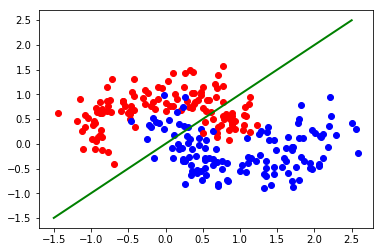

In [28]:
plt.figure()
for i in range(x.shape[0]):
    col = {0: 'r', 1: 'b'}
    plt.plot(x[i, 0], x[i, 1], col[y[i]] + 'o')

xpts = np.linspace(-1.5, 2.5)
ypts = (c.W[0,0] * xpts) / (-c.W[0,1])

plt.plot(xpts, ypts, 'g-', lw=2)




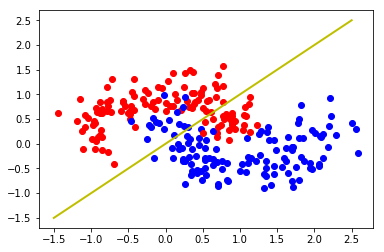

In [29]:
plt.figure()
for i in range(x.shape[0]):
    col = {0: 'r', 1: 'b'}
    plt.plot(x[i, 0], x[i, 1], col[y[i]] + 'o')


xpts = np.linspace(-1.5, 2.5)
ypts = (c.W[1,0] * xpts) / (-c.W[1,1])

plt.plot(xpts, ypts, 'y-', lw=2)

In [33]:
# 查看准确率
np.mean(c.predict(x)==y)

0.81599999999999995